In [ ]:
#  Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Install packages for handling Arabic text and bidirectional display
!pip install arabic-reshaper python-bidi

# Install XGBoost for building gradient boosting machine learning models
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 10.5 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# **DATA**

This section handles the dataset preparation. It includes loading the data, checking for duplicates and outliers, converting date formats, renaming columns, mapping categories, and preparing numerical features for modeling.


In [ ]:
# Define the path
file_path = '/content/drive/MyDrive/SmartServicePriorityModelproject/بلاغات (1).xlsx'

# Read the Excel file into a DataFrame
df=pd.read_excel(file_path)

# Display the first rows of the dataset
df.head(20)


,رقم البلاغ,نوع الخدمة,حالة البلاغ,تاريخ البلاغ,البلدية,عدد السكان,موقع البلاغ,عدد تكرار البلاغ
0,5001,تسوير المباني,مكتمل,2025-08-20 03:00,بلدية الشرائع الفرعية,88000,حي الريان,2
1,5002,الحواجز الخرسانية,مكتمل,2025-08-09 18:00,بلدية بحرة الفرعية,45000,بحرة المجاهدين,3
2,5003,سيارات تالفة,تم الحل,2025-05-16 07:00,بلدية العزيزية الفرعية,95000,شارع العزيزية,6
3,5004,تسوير المباني,مكتمل,2025-05-19 13:00,بلدية المركزية الفرعية,110000,حي الهجلة,1
4,5005,مخلفات البناء,تم الحل,2025-07-01 16:00,بلدية الشرائع الفرعية,88000,حي الشرائع,7
5,5006,تغليف المباني,تم الحل,2025-06-04 05:00,بلدية المعابدة الفرعية,66000,شارع ثبير,2
6,5007,تغليف المباني,قيد المعالجة,2025-05-22 00:00,بلدية العمرة الفرعية,72000,حي النوارية,1
7,5008,تغليف المباني,قيد التنفيذ,2025-07-23 20:00,بلدية العزيزية الفرعية,95000,شارع العزيزية,1
8,5009,الحواجز الخرسانية,بانتظار التفتيش,2025-07-07 20:00,بلدية العزيزية الفرعية,95000,حي العوالي,7
9,5010,سيارات تالفة,مكتمل,2025-08-20 02:00,بلدية العمرة الفرعية,72000,حي النوارية,0


In [ ]:
# Display the shape of the DataFrame as (rows, columns)
df.shape

(10000, 8)

In [ ]:
# Check if there is a missing value
df.isnull().sum()

,0
رقم البلاغ,0
نوع الخدمة,0
حالة البلاغ,0
تاريخ البلاغ,0
البلدية,0
عدد السكان,0
موقع البلاغ,0
عدد تكرار البلاغ,0


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check for outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

outliers = detect_outliers_iqr(df, 'عدد السكان')
print(f"عدد القيم المتطرفة : {len(outliers)}")

outliers = detect_outliers_iqr(df, 'عدد تكرار البلاغ')
print(f"عدد القيم المتطرفة : {len(outliers)}")


عدد القيم المتطرفة : 0
عدد القيم المتطرفة : 0


In [ ]:
# Check the current data types for all columns
df.dtypes

,0
رقم البلاغ,int64
نوع الخدمة,object
حالة البلاغ,object
تاريخ البلاغ,object
البلدية,object
عدد السكان,int64
موقع البلاغ,object
عدد تكرار البلاغ,int64


In [ ]:
# Convert the 'تاريخ البلاغ' column to datetime format
df['تاريخ البلاغ'] = pd.to_datetime(df['تاريخ البلاغ'], errors='coerce')

In [ ]:
# Verify the updated data types
df.dtypes

,0
رقم البلاغ,int64
نوع الخدمة,object
حالة البلاغ,object
تاريخ البلاغ,datetime64[ns]
البلدية,object
عدد السكان,int64
موقع البلاغ,object
عدد تكرار البلاغ,int64


In [ ]:
# Rename column
df = df.rename(columns={'عدد تكرار البلاغ':'عدد البلاغات'})

In [ ]:
# Preview the change
df.head(5)

,رقم البلاغ,نوع الخدمة,حالة البلاغ,تاريخ البلاغ,البلدية,عدد السكان,موقع البلاغ,عدد البلاغات
0,5001,تسوير المباني,مكتمل,2025-08-20 03:00:00,بلدية الشرائع الفرعية,88000,حي الريان,2
1,5002,الحواجز الخرسانية,مكتمل,2025-08-09 18:00:00,بلدية بحرة الفرعية,45000,بحرة المجاهدين,3
2,5003,سيارات تالفة,تم الحل,2025-05-16 07:00:00,بلدية العزيزية الفرعية,95000,شارع العزيزية,6
3,5004,تسوير المباني,مكتمل,2025-05-19 13:00:00,بلدية المركزية الفرعية,110000,حي الهجلة,1
4,5005,مخلفات البناء,تم الحل,2025-07-01 16:00:00,بلدية الشرائع الفرعية,88000,حي الشرائع,7


In [ ]:
# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include='number').columns

# Loop through each numeric column and print its min and max values
for col in numeric_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"▶️ Column: {col}")
    print(f"   Range: {col_min} to {col_max}")
    print("-" * 40)


▶️ Column: رقم البلاغ
   Range: 5001 to 15000
----------------------------------------
▶️ Column: عدد السكان
   Range: 45000 to 110000
----------------------------------------
▶️ Column: عدد البلاغات
   Range: 0 to 7
----------------------------------------


In [ ]:
# Find all columns that are of string (object) type
text_columns = df.select_dtypes(include='object').columns

# Strip spaces and show unique values for each text column
for col in text_columns:
    df[col] = df[col].str.strip()
    print(f"\n--- {col} ---")
    print(df[col].unique())



--- نوع الخدمة ---
['تسوير المباني' 'الحواجز الخرسانية' 'سيارات تالفة' 'مخلفات البناء'
 'تغليف المباني' 'أعمدة إنارة']

--- حالة البلاغ ---
['مكتمل' 'تم الحل' 'قيد المعالجة' 'قيد التنفيذ' 'بانتظار التفتيش'
 'تم الإغلاق' 'بانتظار الإسناد' 'غير موجود على الطبيعة']

--- البلدية ---
['بلدية الشرائع الفرعية' 'بلدية بحرة الفرعية' 'بلدية العزيزية الفرعية'
 'بلدية المركزية الفرعية' 'بلدية المعابدة الفرعية' 'بلدية العمرة الفرعية'
 'بلدية الشوقية الفرعية' 'بلدية الجموم']

--- موقع البلاغ ---
['حي الريان' 'بحرة المجاهدين' 'شارع العزيزية' 'حي الهجلة' 'حي الشرائع'
 'شارع ثبير' 'حي النوارية' 'حي العوالي' 'حي جبل النور' 'حي الكعكية'
 'حي التنعيم' 'حي السلام' 'شارع الحج' 'منطقة الحرم' 'حي الغزالي'
 'حي الشوقية' 'حي حداء' 'شارع الليث' 'حي الخنساء' 'شارع عمر بن الخطاب'
 'شارع أجياد' 'شارع بحرة العام' 'شارع النورية' 'حي الهجرة']


In [ ]:
# Define a dictionary to assign a severity score to each service type
danger_map = {
    'تغليف المباني': 1,
    'تسوير المباني': 2,
    'الحواجز الخرسانية': 3,
    'سيارات تالفة': 4,
    'مخلفات البناء': 5,
    'أعمدة إنارة': 6
}

# Map service types to their corresponding danger score
df['درجة الخطورة'] = df['نوع الخدمة'].map(danger_map)


In [ ]:
# Preview service type and its corresponding severity
df[['نوع الخدمة', 'درجة الخطورة']].head(5)

,نوع الخدمة,درجة الخطورة
0,تسوير المباني,2
1,الحواجز الخرسانية,3
2,سيارات تالفة,4
3,تسوير المباني,2
4,مخلفات البناء,5


In [ ]:
# Define three groups of areas based on development type

# Group 1: Residential neighborhoods with active housing projects
group1_locations = [
    'حي الريان', 'حي الشرائع', 'حي النوارية', 'حي العوالي', 'حي الكعكية',
    'حي التنعيم', 'حي الهجلة', 'حي الهجرة'
]
group1_classification = 'مشاريع سكنية'

# Group 2: Strategic corridors and central development areas
group2_locations = [
    'شارع العزيزية', 'شارع الحج', 'منطقة الحرم', 'شارع أجياد'
]
group2_classification = 'محور إستراتيجي'

# Group 3: Other areas (less defined or specialized projects)
group3_locations = [
    'بحرة المجاهدين', 'شارع ثبير', 'حي جبل النور', 'حي السلام', 'حي الغزالي',
    'حي الشوقية', 'حي حداء', 'شارع الليث', 'حي الخنساء', 'شارع عمر بن الخطاب',
    'شارع بحرة العام', 'شارع النورية'
]
group3_classification = 'أخرى'

# Classify site attribute based on the neighborhood , street
def classify_site_attribute(location):
    if location in group1_locations:
        return group1_classification
    elif location in group2_locations:
        return group2_classification
    elif location in group3_locations:
        return group3_classification
    else:
        return 'غير محدد'

  # Apply classification function to the data
df['صفة الموقع'] = df['موقع البلاغ'].apply(classify_site_attribute)


In [ ]:
# Preview results
df.head(5)

,رقم البلاغ,نوع الخدمة,حالة البلاغ,تاريخ البلاغ,البلدية,عدد السكان,موقع البلاغ,عدد البلاغات,درجة الخطورة,صفة الموقع
0,5001,تسوير المباني,مكتمل,2025-08-20 03:00:00,بلدية الشرائع الفرعية,88000,حي الريان,2,2,مشاريع سكنية
1,5002,الحواجز الخرسانية,مكتمل,2025-08-09 18:00:00,بلدية بحرة الفرعية,45000,بحرة المجاهدين,3,3,أخرى
2,5003,سيارات تالفة,تم الحل,2025-05-16 07:00:00,بلدية العزيزية الفرعية,95000,شارع العزيزية,6,4,محور إستراتيجي
3,5004,تسوير المباني,مكتمل,2025-05-19 13:00:00,بلدية المركزية الفرعية,110000,حي الهجلة,1,2,مشاريع سكنية
4,5005,مخلفات البناء,تم الحل,2025-07-01 16:00:00,بلدية الشرائع الفرعية,88000,حي الشرائع,7,5,مشاريع سكنية


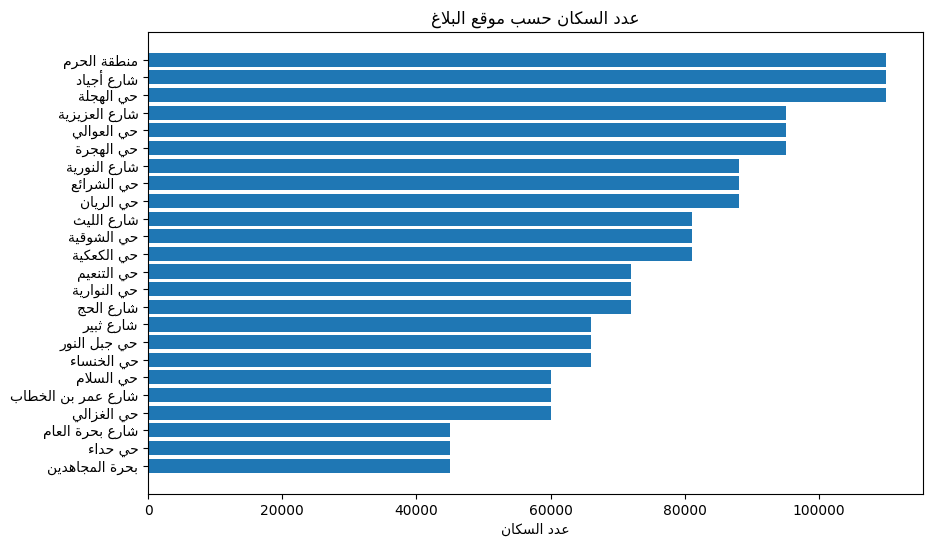

In [ ]:
# Group and visualize the average population by location
grouped = df.groupby('موقع البلاغ')['عدد السكان'].mean().sort_values()
labels = grouped.index
labels_fixed = [get_display(arabic_reshaper.reshape(label)) for label in labels]
values = grouped.values

plt.figure(figsize=(10, 6))
plt.barh(labels_fixed, values)
plt.title(get_display(arabic_reshaper.reshape('عدد السكان حسب موقع البلاغ')))
plt.xlabel(get_display(arabic_reshaper.reshape('عدد السكان')))
plt.show()


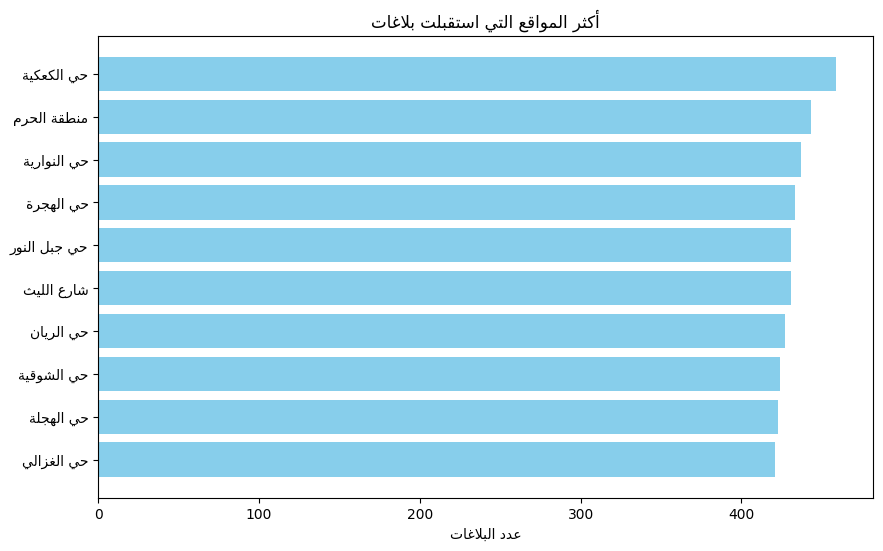

In [ ]:
# Find the top 10 locations with the most reports

top_sites = df['موقع البلاغ'].value_counts().head(10)

labels = [get_display(arabic_reshaper.reshape(i)) for i in top_sites.index]
values = top_sites.values

plt.figure(figsize=(10,6))
plt.barh(labels, values, color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أكثر المواقع التي استقبلت بلاغات')))
plt.xlabel(get_display(arabic_reshaper.reshape('عدد البلاغات')))
plt.gca().invert_yaxis()
plt.show()


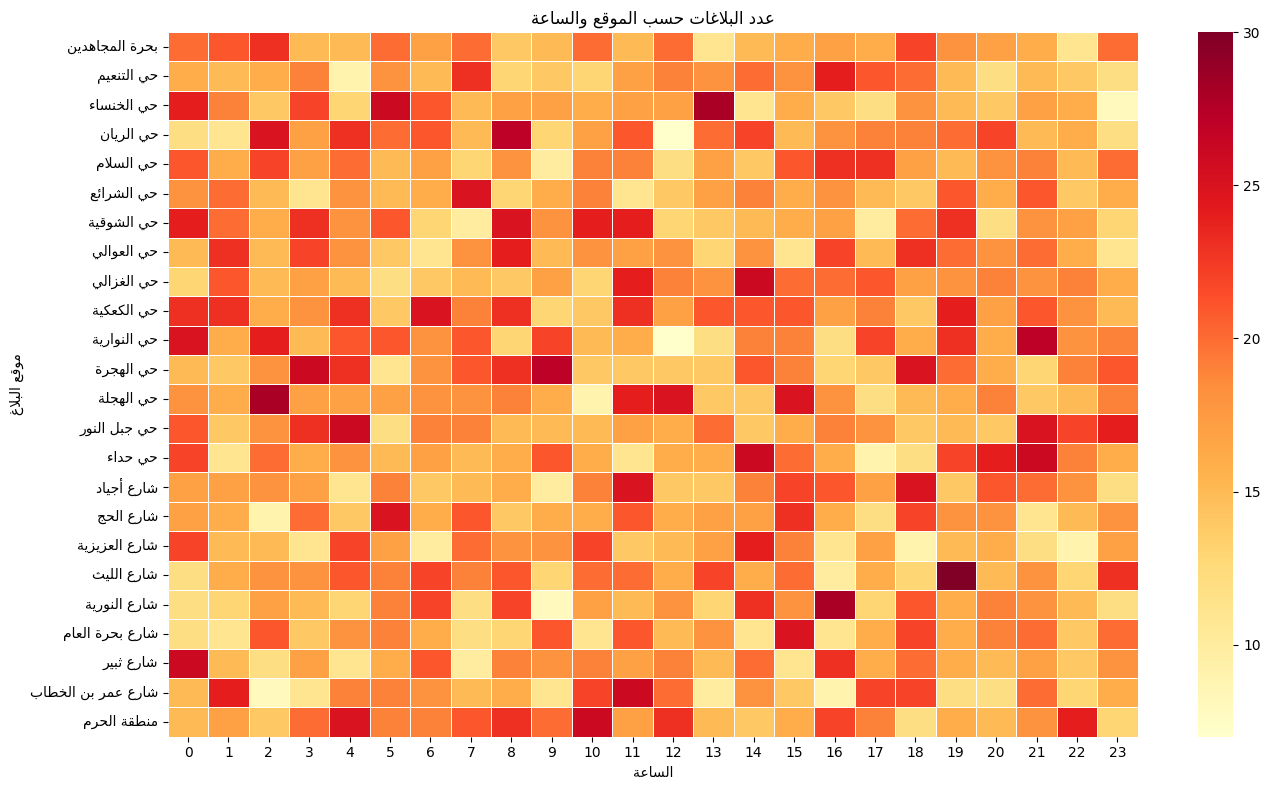

In [ ]:
# Create a temporary copy of the dataframe for plotting
df_temp = df.copy()

# Extract the hour from the datetime column
df_temp['الساعة'] = pd.to_datetime(df_temp['تاريخ البلاغ']).dt.hour

# Group by location and hour, then unstack for heatmap
grouped = df_temp.groupby(['موقع البلاغ', 'الساعة']).size().unstack(fill_value=0)

# Fix Arabic text for y-axis
grouped.index = [get_display(arabic_reshaper.reshape(txt)) for txt in grouped.index]
grouped.columns = [str(col) for col in grouped.columns]  # تأكد أن الأعمدة نصوص (الساعات)

# Plot heatmap: number of reports by hour and location
plt.figure(figsize=(14, 8))
sns.heatmap(grouped, cmap="YlOrRd", linewidths=.5)

plt.title(get_display(arabic_reshaper.reshape('عدد البلاغات حسب الموقع والساعة')))
plt.xlabel(get_display(arabic_reshaper.reshape('الساعة')))
plt.ylabel(get_display(arabic_reshaper.reshape('موقع البلاغ')))
plt.tight_layout()
plt.show()


/tmp/ipython-input-23-3047625435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="صفة الموقع", y="عدد البلاغات", data=grouped, palette="YlOrBr")


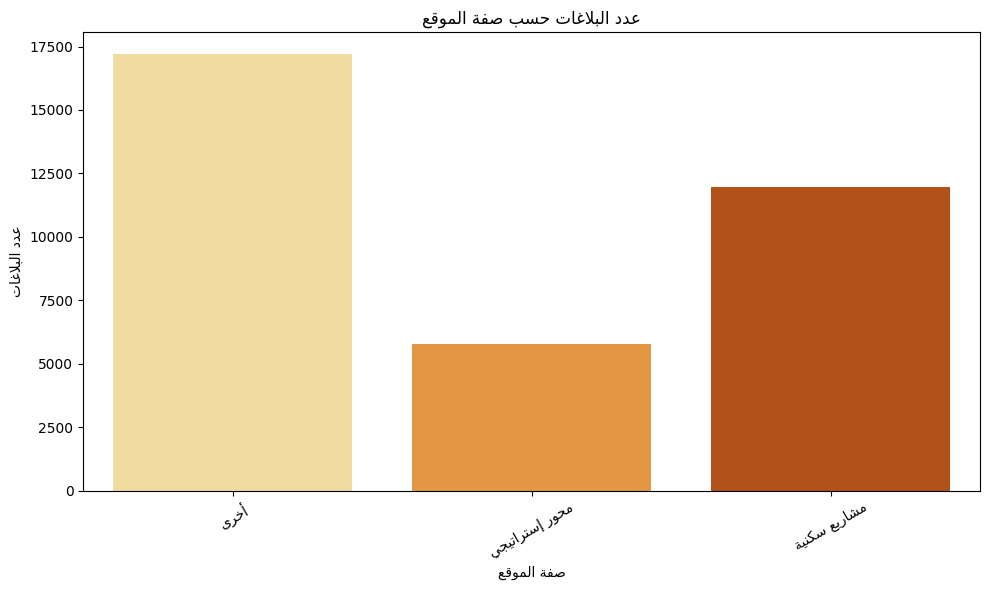

In [ ]:
# Group number of reports by site classification
grouped = df.groupby("صفة الموقع")["عدد البلاغات"].sum().reset_index()

grouped["صفة الموقع"] = [get_display(arabic_reshaper.reshape(txt)) for txt in grouped["صفة الموقع"]]

plt.figure(figsize=(10, 6))
sns.barplot(x="صفة الموقع", y="عدد البلاغات", data=grouped, palette="YlOrBr")

plt.title(get_display(arabic_reshaper.reshape("عدد البلاغات حسب صفة الموقع")))
plt.xlabel(get_display(arabic_reshaper.reshape("صفة الموقع")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد البلاغات")))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
# Mapping of site attribute importance (ordinal encoding)
# Higher number = higher priority
site_rank_map = {
    'محور إستراتيجي': 3,
    'مشاريع سكنية': 2,
    'أخرى': 1,
    'غير محدد': 0  # assign 0 for undefined
}

# Apply the mapping directly to the original column
df['صفة الموقع'] = df['صفة الموقع'].map(site_rank_map)


In [ ]:
df.head(5)

,رقم البلاغ,نوع الخدمة,حالة البلاغ,تاريخ البلاغ,البلدية,عدد السكان,موقع البلاغ,عدد البلاغات,درجة الخطورة,صفة الموقع
0,5001,تسوير المباني,مكتمل,2025-08-20 03:00:00,بلدية الشرائع الفرعية,88000,حي الريان,2,2,2
1,5002,الحواجز الخرسانية,مكتمل,2025-08-09 18:00:00,بلدية بحرة الفرعية,45000,بحرة المجاهدين,3,3,1
2,5003,سيارات تالفة,تم الحل,2025-05-16 07:00:00,بلدية العزيزية الفرعية,95000,شارع العزيزية,6,4,3
3,5004,تسوير المباني,مكتمل,2025-05-19 13:00:00,بلدية المركزية الفرعية,110000,حي الهجلة,1,2,2
4,5005,مخلفات البناء,تم الحل,2025-07-01 16:00:00,بلدية الشرائع الفرعية,88000,حي الشرائع,7,5,2


# **MODEL**

This section prepares the training data for machine learning.

We manually assign weights to important features to calculate a base score for each report.

Weighted Scoring: Each report is evaluated based on danger level, population, number of reports, and site importance.

Contextual Boosting: Additional boost is added to simulate real-world priority (e.g., strategic areas or repeated dangerous reports).

Priority Labeling: The final score is categorized into three priority levels: Low, Medium, High — used as the prediction target.

In [ ]:

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shape of training and testing sets
print("شكل بيانات التدريب:", train_df.shape)
print("شكل بيانات الاختبار:", test_df.shape)


شكل بيانات التدريب: (8000, 10)
شكل بيانات الاختبار: (2000, 10)


In [ ]:
# Define manual feature weights (used to create an intermediate score)
weights = {
    'درجة الخطورة': 0.4,
    'عدد البلاغات': 0.3,
    'عدد السكان': 0.2,
    'صفة الموقع': 0.1
}

# Compute base score using the weighted sum of selected features
train_df['score'] = (
    train_df['درجة الخطورة'] * weights['درجة الخطورة'] +
    train_df['عدد البلاغات'] * weights['عدد البلاغات'] +
    train_df['عدد السكان'] * weights['عدد السكان'] +
    train_df['صفة الموقع'] * weights['صفة الموقع']
)

# Function to add a context-aware boost to the score
# This simulates more realistic prioritization
def apply_contextual_boost(row):
    boost = 0

    # Increase priority for dangerous and repeated reports
    if row['درجة الخطورة'] >= 4 and row['عدد البلاغات'] >= 3:
        boost += 5000

    # Slight boost for reports from strategic areas
    if row['صفة الموقع'] == 3:
        boost += 3000

    # High population and medium/high danger gets extra boost
    if row['عدد السكان'] > 100000 and row['درجة الخطورة'] >= 3:
        boost += 4000

    # Add small noise to avoid exact duplicates in scoring
    noise = np.random.randint(-100, 100)
    return boost + noise

# Apply the contextual boost and update final score
train_df['boost'] = train_df.apply(apply_contextual_boost, axis=1)
train_df['score'] += train_df['boost']

# Use quantile-based binning to assign priority levels
train_df['مستوى_الأولوية'] = pd.qcut(train_df['score'], q=3, labels=['منخفضة', 'متوسطة', 'عالية'])

# Show the result
train_df[['درجة الخطورة', 'عدد البلاغات', 'عدد السكان', 'صفة الموقع', 'score', 'boost', 'مستوى_الأولوية']].head()



,درجة الخطورة,عدد البلاغات,عدد السكان,صفة الموقع,score,boost,مستوى_الأولوية
9254,1,5,72000,3,17394.2,2992,متوسطة
1561,5,2,81000,1,16163.7,-39,متوسطة
1670,2,0,45000,1,9004.9,4,منخفضة
6087,2,3,72000,2,14339.9,-62,منخفضة
6669,5,2,95000,2,19063.8,61,عالية


In [ ]:
# Define features used for model training
features = ['عدد السكان', 'عدد البلاغات', 'درجة الخطورة', 'صفة الموقع']

# input features
X_train = train_df[features]

# target label
y_train = train_df['مستوى_الأولوية']

# Show the result
X_train.head(), y_train.head()


(      عدد السكان  عدد البلاغات  درجة الخطورة  صفة الموقع
 9254       72000             5             1           3
 1561       81000             2             5           1
 1670       45000             0             2           1
 6087       72000             3             2           2
 6669       95000             2             5           2,
 9254    متوسطة
 1561    متوسطة
 1670    منخفضة
 6087    منخفضة
 6669     عالية
 Name: مستوى_الأولوية, dtype: category
 Categories (3, object): ['منخفضة' < 'متوسطة' < 'عالية'])

In [ ]:
# Same features from test data
X_test = test_df[features]

# Show the result
X_test.head()


,عدد السكان,عدد البلاغات,درجة الخطورة,صفة الموقع
6252,95000,4,4,3
4684,95000,6,4,3
1731,81000,7,1,2
4742,60000,0,4,1
4521,66000,2,2,1


## **Random Forest Classifier**

In [ ]:

# Create the model with 100 trees and max depth 10
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit model to training data
rf_model.fit(X_train, y_train)
print(" تم تدريب نموذج Random Forest بنجاح.")


 تم تدريب نموذج Random Forest بنجاح.


### **Train**

The model is trained using selected features (population, report count, danger level, site type). A RandomForestClassifier is used with specific parameters (e.g., 100 trees, max depth 10).


In [ ]:
# Evaluate model on training data
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(" دقة النموذج على بيانات التدريب: {:.2f}%".format(train_accuracy * 100))


 دقة النموذج على بيانات التدريب: 96.26%


In [ ]:
print("\n Classification Report:")
print(classification_report(y_train, y_train_pred))



 Classification Report:
              precision    recall  f1-score   support

       عالية       1.00      0.95      0.97      2666
      متوسطة       0.94      0.95      0.94      2667
      منخفضة       0.95      0.99      0.97      2667

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000



In [ ]:
print("\n Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))



 Confusion Matrix:
[[2523  143    0]
 [   0 2541  126]
 [   0   30 2637]]


The model achieved high accuracy on training data.
This means it learned patterns well from the input features.
However, if accuracy is too high, we check the test results to make sure the model didn’t overfit.

### **Test**

The trained model predicts on the test set. Boosting logic and scoring are applied to evaluate how well the model generalizes using accuracy, classification report, and confusion matrix.



In [ ]:
# Evaluate model on test data
y_test_pred = rf_model.predict(X_test)

# Display a few sample predictions from the test set
pd.DataFrame({
    'توقع النموذج': y_test_pred
}).head(10)


,توقع النموذج
0,عالية
1,عالية
2,متوسطة
3,منخفضة
4,منخفضة
5,عالية
6,عالية
7,متوسطة
8,منخفضة
9,عالية


In [ ]:
# Recompute score for test set based on the same formula
# This ensures test set is evaluated using same logic

# Compute base score using test data
test_df['score'] = (
    test_df['درجة الخطورة'] * weights['درجة الخطورة'] +
    test_df['عدد البلاغات'] * weights['عدد البلاغات'] +
    test_df['عدد السكان'] * weights['عدد السكان'] +
    test_df['صفة الموقع'] * weights['صفة الموقع']
)

# Apply boost logic to test data
test_df['boost'] = test_df.apply(apply_contextual_boost, axis=1)
test_df['score'] += test_df['boost']

# Bin the final score into priority classes
test_df['مستوى_الأولوية'] = pd.qcut(test_df['score'], q=3, labels=['منخفضة', 'متوسطة', 'عالية'])

y_test_true = test_df['مستوى_الأولوية']


In [ ]:

y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test_true, y_test_pred)
print(" دقة النموذج على بيانات الاختبار: {:.2f}%".format(test_accuracy * 100))


 دقة النموذج على بيانات الاختبار: 96.80%


In [ ]:
print("\n Classification Report:")
print(classification_report(y_test_true, y_test_pred))



 Classification Report:
              precision    recall  f1-score   support

       عالية       1.00      0.96      0.98       667
      متوسطة       0.93      0.97      0.95       666
      منخفضة       0.97      0.98      0.97       667

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
print("\n Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred))



 Confusion Matrix:
[[637  30   0]
 [  0 648  18]
 [  0  16 651]]


Test predictions show how well the model performs on unseen data.
Balanced accuracy and clear separation between the priority classes indicate that the model generalizes well.

## **XGBoost Classifier**

In [ ]:

# Encode Target Labels for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


XGBoost requires numeric labels.  
We use `LabelEncoder` to convert the target values (`y_train`) from Arabic strings like "عالية", "متوسطة", "منخفضة"  
into integers (e.g., 2, 1, 0).  
This is required because XGBoost does not support non-numeric target labels by default.

In [ ]:
# Create and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Create and train XGBoost model
xgb_model.fit(X_train, y_train_encoded)
print(" تم تدريب نموذج XGBoost بنجاح.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 تم تدريب نموذج XGBoost بنجاح.


### **Train**

An XGBoost model is trained on the same training data. Labels are encoded numerically before training. The model is optimized for multi-class classification.


In [ ]:
# Evaluate XGBoost on training
y_train_pred_xgb = xgb_model.predict(X_train)

# Convert numerical predictions back to original string labels
y_train_pred_xgb_labels = label_encoder.inverse_transform(y_train_pred_xgb)
y_train_labels_true = y_train  # Keep original labels as ground truth


In [ ]:

# Evaluation

accuracy_xgb = accuracy_score(y_train_labels_true, y_train_pred_xgb_labels)
print(" دقة XGBoost على بيانات التدريب: {:.2f}%".format(accuracy_xgb * 100))




 دقة XGBoost على بيانات التدريب: 96.29%


In [ ]:
print("\n Classification Report:")
print(classification_report(y_train_labels_true, y_train_pred_xgb_labels))



 Classification Report:
              precision    recall  f1-score   support

       عالية       0.99      0.96      0.97      2666
      متوسطة       0.94      0.95      0.94      2667
      منخفضة       0.96      0.98      0.97      2667

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000



In [ ]:
print("\n Confusion Matrix:")
print(confusion_matrix(y_train_labels_true, y_train_pred_xgb_labels))



 Confusion Matrix:
[[2547  119    0]
 [  23 2530  114]
 [   0   41 2626]]


XGBoost model also shows strong performance on training data.
The gradient boosting approach helps capture complex patterns with fewer trees.


### **Test**

Predictions from the XGBoost model are decoded back to text labels. The model is evaluated on the test set using accuracy, classification report, and confusion matrix.



In [ ]:
# Evaluate XGBoost on test
y_test_pred_xgb = xgb_model.predict(X_test)

# Decode test predictions
y_test_pred_xgb_labels = label_encoder.inverse_transform(y_test_pred_xgb)

# Use priority levels from test set as true labels
y_test_true = test_df['مستوى_الأولوية']


In [ ]:

# Evaluation

accuracy_test_xgb = accuracy_score(y_test_true, y_test_pred_xgb_labels)
print(" دقة XGBoost على بيانات الاختبار: {:.2f}%".format(accuracy_test_xgb * 100))




 دقة XGBoost على بيانات الاختبار: 96.50%


In [ ]:
print("\n Classification Report:")
print(classification_report(y_test_true, y_test_pred_xgb_labels))



 Classification Report:
              precision    recall  f1-score   support

       عالية       0.99      0.96      0.97       667
      متوسطة       0.93      0.97      0.95       666
      منخفضة       0.98      0.97      0.97       667

    accuracy                           0.96      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.96      0.97      2000



In [ ]:
print("\n Confusion Matrix:")
print(confusion_matrix(y_test_true, y_test_pred_xgb_labels))



 Confusion Matrix:
[[641  26   0]
 [  7 643  16]
 [  0  21 646]]


Like the Random Forest, the test accuracy is used to check for overfitting.
If both training and test scores are close, the model is considered stable and reliable.


## **Cross validation scores**

Both models are evaluated using cross-validation (5 folds) to ensure performance is stable across different data splits. It helps confirm generalizability.



In [ ]:
# Random Forest Cross-Validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(" متوسط دقة Random Forest عبر 5 طيات:", np.mean(rf_scores))


 متوسط دقة Random Forest عبر 5 طيات: 0.9571249999999999


In [ ]:
# XGBoost Cross-Validation
xgb_scores = cross_val_score(xgb_model, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(" متوسط دقة XGBoost عبر 5 طيات:", np.mean(xgb_scores))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:43:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

 متوسط دقة XGBoost عبر 5 طيات: 0.9568749999999999


#### **GRID SEARCH FOR BEST RF PARAMETERS**


This section fine-tunes the Random Forest model using GridSearchCV. Different combinations of hyperparameters are tested to find the best settings. The best model is then used for final predictions and saved.



In [ ]:

# 1) Define hyperparameter grid for Random Forest tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2) Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 3) Fit grid search to training data
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:

# 4) Show best parameters and accuracy from grid search
print("أفضل معاملات:", grid_search.best_params_)
print("أفضل دقة CV:", grid_search.best_score_)

أفضل معاملات: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
أفضل دقة CV: 0.9582499999999999


In [ ]:
# 5) Use the best model from grid search for evaluation
best_rf = grid_search.best_estimator_
test_pred = best_rf.predict(X_test)
test_acc = accuracy_score(test_df['مستوى_الأولوية'], test_pred)
print("دقة أفضل نموذج على الاختبار: {:.2f}%".format(test_acc * 100))


دقة أفضل نموذج على الاختبار: 96.70%


## **Save final model and config for later use**

he final model, along with essential configurations and mappings (like weights and danger maps), is saved using joblib. This allows reusing the model in production or web deployment.



In [ ]:
import joblib

artifacts = {
    'model': best_rf,                  # RandomForestClassifier
    'features': features,              # ['عدد السكان', 'عدد البلاغات', ...]
    'danger_map': danger_map,
    'weights': weights,
    'group1_locations': group1_locations,
    'group2_locations': group2_locations,
    'group3_locations': group3_locations,
    'group1_classification': group1_classification,
    'group2_classification': group2_classification,
    'group3_classification': group3_classification
}

joblib.dump(artifacts, 'final_model.pkl')



['final_model.pkl']